In [56]:
from Bio.KEGG.REST import *
from Bio.KEGG.KGML import KGML_parser
from Bio import Entrez
import scipy.stats as stats
import numpy as np
import pandas as pd
from io import StringIO
from Bio.Graphics.KGML_vis import KGMLCanvas

from IPython.display import Image

## Task 1: KEGG and gene id mapping

Familiarize yourself with the KEGG Rest interface and how to access it with Biopyhton:

http://www.genome.jp/kegg/rest/keggapi.html

http://nbviewer.jupyter.org/github/widdowquinn/notebooks/blob/master/Biopython_KGML_intro.ipynb

### Subtask 1.1 Extract gene lists for all (mouse) KEGG pathways and store them in a suitable Python data structure

In [8]:
# get all 'pathway's from organism 'mmu' (Mus musculus)

response = kegg_list('pathway', 'mmu').read()

kegg_df = pd.read_csv(StringIO(response), sep = '\t', header = None)

kegg_df.head()


,0,1
0,path:mmu00010,Glycolysis / Gluconeogenesis - Mus musculus (m...
1,path:mmu00020,Citrate cycle (TCA cycle) - Mus musculus (mouse)
2,path:mmu00030,Pentose phosphate pathway - Mus musculus (mouse)
3,path:mmu00040,Pentose and glucuronate interconversions - Mus...
4,path:mmu00051,Fructose and mannose metabolism - Mus musculus...


### Subtask 1.2: Save the KEGG gene sets as a gmt file after you made sure they have the proper gene ids with respect to your DE analysis

hints: 

http://www.broadinstitute.org/cancer/software/gsea/wiki/index.php/Data_formats

In [9]:
# extract pathway IDs from the raw REST response
pathways = [((pathway.split('\t')[0]).split(':'))[-1] for pathway in response.split('\n')[:-1]]
# print the number of pathways and the IDs of the first 10
print(len(pathways))
pathways[:10]

326


['mmu00010',
 'mmu00020',
 'mmu00030',
 'mmu00040',
 'mmu00051',
 'mmu00052',
 'mmu00053',
 'mmu00061',
 'mmu00062',
 'mmu00071']

In [10]:
wholeGeneList = ""

genelists_pathways = []

for i in range(len(pathways)):

    geneList = kegg_link('mmu', pathways[i]).read()

    pathsgenes = pd.read_csv(StringIO(geneList), sep = '\t', header = None)

    genelists_pathways.append(pathsgenes)

genelists_pathways

[                0              1
 0   path:mmu00010  mmu:100042025
 1   path:mmu00010     mmu:103988
 2   path:mmu00010     mmu:106557
 3   path:mmu00010     mmu:110695
 4   path:mmu00010      mmu:11522
 5   path:mmu00010      mmu:11529
 6   path:mmu00010      mmu:11532
 7   path:mmu00010      mmu:11669
 8   path:mmu00010      mmu:11670
 9   path:mmu00010      mmu:11671
 10  path:mmu00010      mmu:11674
 11  path:mmu00010      mmu:11676
 12  path:mmu00010      mmu:12183
 13  path:mmu00010      mmu:13382
 14  path:mmu00010      mmu:13806
 15  path:mmu00010      mmu:13807
 16  path:mmu00010      mmu:13808
 17  path:mmu00010      mmu:14120
 18  path:mmu00010      mmu:14121
 19  path:mmu00010      mmu:14377
 20  path:mmu00010      mmu:14378
 21  path:mmu00010      mmu:14433
 22  path:mmu00010      mmu:14447
 23  path:mmu00010      mmu:14751
 24  path:mmu00010      mmu:15275
 25  path:mmu00010      mmu:15277
 26  path:mmu00010      mmu:16828
 27  path:mmu00010      mmu:16832
 28  path:mmu0

In [11]:
pw_entrez = pd.concat(genelists_pathways)
pw_entrez.columns = ['path', 'entrez']
pw_entrez['entrez'] = pw_entrez['entrez'].str.replace('mmu:', '')

In [12]:
pw_entrez

,path,entrez
0,path:mmu00010,100042025
1,path:mmu00010,103988
2,path:mmu00010,106557
3,path:mmu00010,110695
4,path:mmu00010,11522
5,path:mmu00010,11529
6,path:mmu00010,11532
7,path:mmu00010,11669
8,path:mmu00010,11670
9,path:mmu00010,11671


In [62]:
urllib.request.urlretrieve("http://www.informatics.jax.org/downloads/reports/MGI_Gene_Model_Coord.rpt", "files/alternative.rpt")


('files/alternative.rpt', <http.client.HTTPMessage at 0x10ba46b00>)

In [13]:
rescue_file = pd.read_csv('files/alternative.rpt', sep='\t', index_col=False)
rescue_file.head()


,1. MGI accession id,2. marker type,3. marker symbol,4. marker name,5. genome build,6. Entrez gene id,7. NCBI gene chromosome,8. NCBI gene start,9. NCBI gene end,10. NCBI gene strand,11. Ensembl gene id,12. Ensembl gene chromosome,13. Ensembl gene start,14. Ensembl gene end,15. Ensembl gene strand,16. VEGA gene id,17. VEGA gene chromosome,18. VEGA gene start,19. VEGA gene end,20. VEGA gene strand
0,MGI:87853,Gene,a,nonagouti,GRCm38,50518.0,2,154950204.0,155051012.0,+,ENSMUSG00000027596,2,154791402.0,155051012.0,+,OTTMUSG00000015981,2,154791402.0,155051012.0,+
1,MGI:87854,Gene,Pzp,"PZP, alpha-2-macroglobulin like",GRCm38,11287.0,6,128483567.0,128526720.0,-,ENSMUSG00000030359,6,128483567.0,128526720.0,-,OTTMUSG00000022212,6,128483567.0,128526720.0,-
2,MGI:87859,Gene,Abl1,"c-abl oncogene 1, non-receptor tyrosine kinase",GRCm38,11350.0,2,31688354.0,31807093.0,+,ENSMUSG00000026842,2,31688376.0,31804227.0,+,OTTMUSG00000012077,2,31688376.0,31804227.0,+
3,MGI:87860,Gene,Abl2,v-abl Abelson murine leukemia viral oncogene 2...,GRCm38,11352.0,1,156558171.0,156649619.0,+,ENSMUSG00000026596,1,156558786.0,156649568.0,+,OTTMUSG00000037114,1,156558786.0,156649568.0,+
4,MGI:87862,Gene,Scgb1b27,"secretoglobin, family 1B, member 27",GRCm38,11354.0,7,34021567.0,34022881.0,+,ENSMUSG00000066583,7,34021483.0,34022881.0,+,OTTMUSG00000008372,7,34021483.0,34022881.0,+


In [14]:
##### Select the 3rd and 6th
symbol_to_entrez = rescue_file[['3. marker symbol','6. Entrez gene id']]
symbol_to_entrez = symbol_to_entrez.dropna()
symbol_to_entrez.columns = ['symbol', 'entrez']
symbol_to_entrez['entrez']  = symbol_to_entrez['entrez'].apply(int).apply(str)
symbol_to_entrez.head()
#rescue_file_short.shape

,symbol,entrez
0,a,50518
1,Pzp,11287
2,Abl1,11350
3,Abl2,11352
4,Scgb1b27,11354


## Task 2: Gene Set Enrichment

### Subtask 2.1: Read in the csv file you produced during the Differential Expression module, extract a gene list (as a python list of gene symbols) from your favorite multiple correction column (and store it in a variable)

In [15]:
pvalues = pd.read_csv('files/DEanalysis.txt', sep="\t")

In [16]:
#pvalues = pvalues.set_index('Gene.1')
pvalues.head()



,Gene.1,raw_p_values,sidak,holm-sidak,holm,simes-hochberg,hommel,fdr_bh,fdr_by,fdr_tsbh,fdr_tsbky,fd,is_intersting
0,544988,0.011047,1.0,1.0,1.0,0.999972,0.999972,0.027006,0.285417,0.014607,0.015459,-0.043042,False
1,100043387,0.175899,1.0,1.0,1.0,0.999972,0.999972,0.265337,1.000000,0.143514,0.151889,-0.083700,False
2,0610007C21Rik,0.602466,1.0,1.0,1.0,0.999972,0.999972,0.695288,1.000000,0.376064,0.398010,-0.012175,False
3,0610007L01Rik,0.579277,1.0,1.0,1.0,0.999972,0.999972,0.675813,1.000000,0.365530,0.386862,0.008500,False
4,0610007P08Rik,0.066307,1.0,1.0,1.0,0.999972,0.999972,0.120020,1.000000,0.064916,0.068704,-0.063438,False


In [17]:
gene_list = pvalues[['Gene.1','is_intersting']]
gene_list.head()
#gene_list.shape

,Gene.1,is_intersting
0,544988,False
1,100043387,False
2,0610007C21Rik,False
3,0610007L01Rik,False
4,0610007P08Rik,False


### Subtask 2.2: Perform gene set enrichment (Fisher's exact test or an hypergeometric test will do for our purposes) with the KEGG gene sets you extracted in Task 1 (you may want to store the results in a pandas dataframe and write them to csv)

hint:

https://genetrail2.bioinf.uni-sb.de/help?topic=set_level_statistics

In [18]:
#gse_df = gene_list.join(symbol_to_entrez, how="inner")

gse_df = gene_list.merge(symbol_to_entrez, left_on='Gene.1', right_on='symbol')

In [19]:
gse_df.head()

,Gene.1,is_intersting,symbol,entrez
0,0610009B22Rik,False,0610009B22Rik,66050
1,0610009L18Rik,False,0610009L18Rik,66838
2,0610010F05Rik,False,0610010F05Rik,71675
3,0610010K14Rik,False,0610010K14Rik,104457
4,0610012G03Rik,False,0610012G03Rik,106264


In [20]:
merge_all = gse_df.merge(pw_entrez, on='entrez')
merge_all.head()

,Gene.1,is_intersting,symbol,entrez,path
0,1300017J02Rik,False,1300017J02Rik,71775,path:mmu04066
1,1300017J02Rik,False,1300017J02Rik,71775,path:mmu04216
2,1300017J02Rik,False,1300017J02Rik,71775,path:mmu04978
3,1700009N14Rik,False,1700009N14Rik,75471,path:mmu03008
4,1700009N14Rik,False,1700009N14Rik,75471,path:mmu03013


In [21]:
merge_all_gen = merge_all.drop_duplicates('Gene.1')
#Numer of interesting genes 
merge_all_gen.groupby('is_intersting').count()

,Gene.1,symbol,entrez,path
is_intersting,,,,
False,6763,6763,6763,6763
True,589,589,589,589


In [22]:
merge_all.head()

,Gene.1,is_intersting,symbol,entrez,path
0,1300017J02Rik,False,1300017J02Rik,71775,path:mmu04066
1,1300017J02Rik,False,1300017J02Rik,71775,path:mmu04216
2,1300017J02Rik,False,1300017J02Rik,71775,path:mmu04978
3,1700009N14Rik,False,1700009N14Rik,75471,path:mmu03008
4,1700009N14Rik,False,1700009N14Rik,75471,path:mmu03013


In [23]:
con_table = pd.crosstab(merge_all.iloc[:,1]==True, merge_all.iloc[:,4]=='path:mmu04066')
con_table

path,False,True
is_intersting,,
False,26613,95
True,2188,3


In [24]:
pathwayTrueinterestingTrue = merge_all.groupby('path').is_intersting.sum()
pathwayTrueinterestingTrue.name = "in_int"
df_cont = pd.DataFrame(pathwayTrueinterestingTrue)
df_cont.head()

,in_int
path,
path:mmu00010,8.0
path:mmu00020,1.0
path:mmu00030,0.0
path:mmu00040,5.0
path:mmu00051,2.0


In [25]:
firstRow = merge_all.groupby('path').size()
df_cont["in_non"] = firstRow - df_cont['in_int']
df_cont.head()

,in_int,in_non
path,,
path:mmu00010,8.0,53.0
path:mmu00020,1.0,30.0
path:mmu00030,0.0,30.0
path:mmu00040,5.0,19.0
path:mmu00051,2.0,31.0


In [26]:
firstCol = merge_all.drop_duplicates('symbol').is_intersting.sum()
df_cont['out_int'] = firstCol-df_cont['in_int']
df_cont.head()

,in_int,in_non,out_int
path,,,
path:mmu00010,8.0,53.0,581.0
path:mmu00020,1.0,30.0,588.0
path:mmu00030,0.0,30.0,589.0
path:mmu00040,5.0,19.0,584.0
path:mmu00051,2.0,31.0,587.0


In [27]:
total = merge_all.drop_duplicates('symbol').shape[0]
df_cont['out_non'] = total -df_cont.sum(axis=1)
df_cont.head()

,in_int,in_non,out_int,out_non
path,,,,
path:mmu00010,8.0,53.0,581.0,6710.0
path:mmu00020,1.0,30.0,588.0,6733.0
path:mmu00030,0.0,30.0,589.0,6733.0
path:mmu00040,5.0,19.0,584.0,6744.0
path:mmu00051,2.0,31.0,587.0,6732.0


In [28]:
pvalues_fisher = []

for i in range(len(df_cont['in_int'])):
    con_table = np.reshape( df_cont.iloc[i].values, (2,2))
    oddsratio, pvalu = stats.fisher_exact(con_table, alternative='greater')
    pvalues_fisher.append(pvalu)

In [29]:
p_fisher = pd.Series(pvalues_fisher)

p_fisher.head()

0    0.112030
1    0.925295
2    1.000000
3    0.038515
4    0.754425
dtype: float64

### Subtask 2.3: Extract a list of significantly (at 0.05 significance) enriched KEGG pathways

In [32]:
significant_pw = pd.Series(p_fisher)
significant_pw = significant_pw[significant_pw < 0.05]
significant_pw

pd.Series(p_fisher)

0      1.120303e-01
1      9.252947e-01
2      1.000000e+00
3      3.851462e-02
4      7.544248e-01
5      2.162306e-01
6      4.384410e-04
7      1.000000e+00
8      6.065265e-01
9      4.915906e-01
10     2.185192e-01
11     4.290151e-01
12     1.000000e+00
13     1.000000e+00
14     3.554827e-08
15     9.854433e-01
16     1.000000e+00
17     8.357639e-01
18     3.942044e-01
19     3.504888e-01
20     7.961156e-01
21     6.322085e-01
22     8.859599e-01
23     4.373745e-01
24     1.000000e+00
25     6.653220e-01
26     6.962126e-01
27     2.124870e-01
28     7.829666e-01
29     5.104668e-01
           ...     
296    7.286349e-01
297    4.694579e-01
298    8.144396e-01
299    4.957600e-01
300    5.699348e-02
301    2.258382e-01
302    6.826590e-01
303    6.322085e-01
304    8.618627e-01
305    6.182551e-01
306    8.643402e-01
307    8.966168e-01
308    6.206670e-01
309    4.798759e-01
310    6.479860e-01
311    5.316960e-01
312    1.000000e+00
313    6.324935e-03
314    1.201625e-01


## Task 3: KEGG map visualization

#### hint:

http://nbviewer.jupyter.org/github/widdowquinn/notebooks/blob/master/Biopython_KGML_intro.ipynb

#### remark:

In real life you may want to use the R-based tool pathview: https://bioconductor.org/packages/release/bioc/html/pathview.html (if you insist you can also try to use r2py for using pathview from Python during the practical)

For Python (in addition to the Biopyhton module) https://github.com/idekerlab/py2cytoscape in combination with https://github.com/idekerlab/KEGGscape may be another alternative (in the future)

Generally speaking, it is always a good idea to pay attention also to other pathway databases like Reactome or WikiPathways ...

### Subtask 3.1: Pick some significantly enriched KEGG pathways of your choice from 2.3 and visualize them

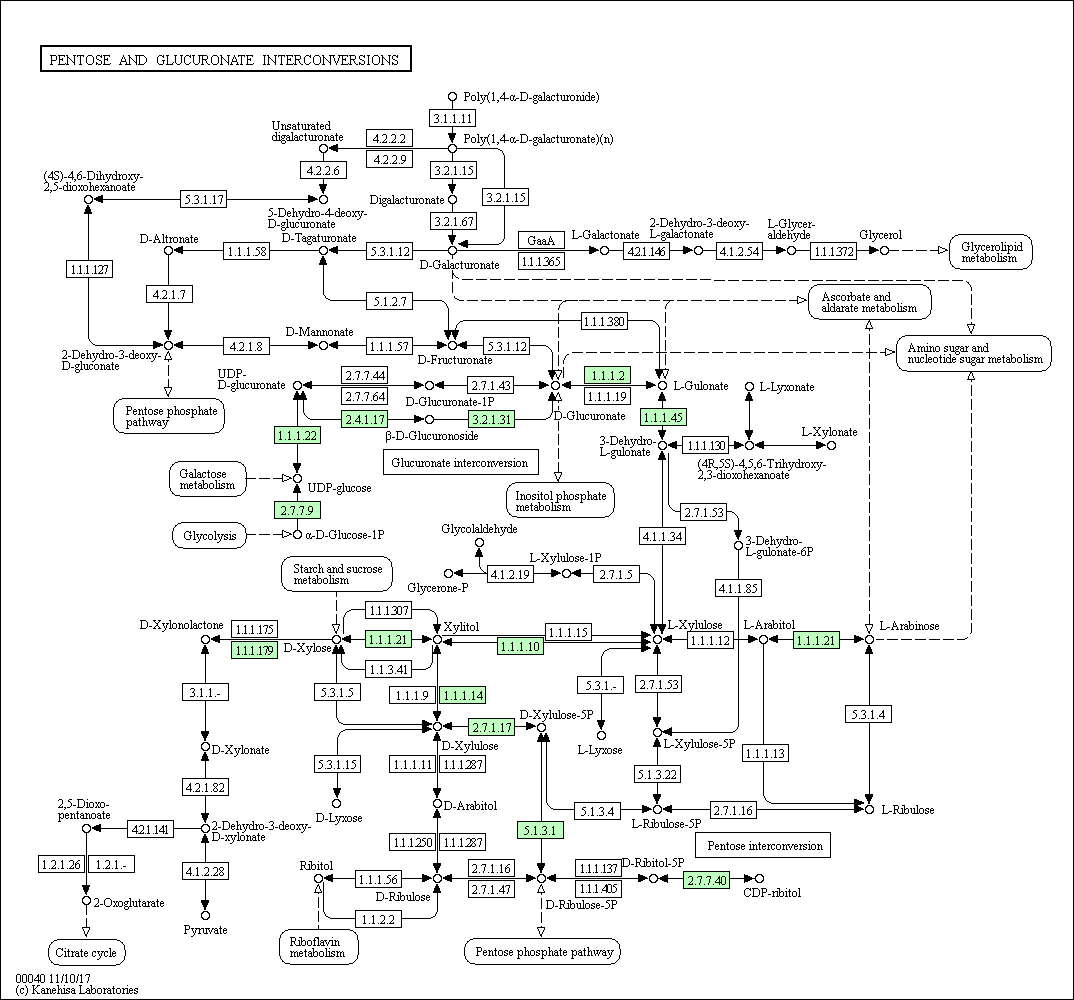

In [33]:
Image(kegg_get("path:mmu00040", "image").read())

### Subtask 3.2: Define a a suitable binary color scheme respresenting the fact whether a gene is significantly expressed or not

hint: 

http://www.rapidtables.com/web/color/RGB_Color.htm

### Subtask 3.3: Visualize the pathway(s) from 3.1 in such a way that the included genes have the corresponding color from 3.2 ( you may need to define a suitable mapping from single genes to what is actually shown in the pathway map...)

In [133]:
# some hints on how the data structures of a random pathway look like# some h 
pathway = KGML_parser.read(kegg_get('mmu00040', "kgml"))
#print('### Pathway description ###')
#print(pathway)

in_pathway = []
diff_expressed = []

for gene in pathway.genes[0:14]:
    #print('### New gene: ###')
    #print(gene.name)
    gene_list = gene.name.split(' ')
    for g in gene_list:
        g = g[4:]
        #print(g)
        genes = merge_all[merge_all['entrez'].str.contains(g)]


        #color green
        in_genes = genes[genes['path'].str.contains('path:mmu00040')]
        in_pathway.append(in_genes)
        
        if in_genes['is_intersting'].values:
            #color red
            #print (in_genes)
            diff_expressed.append(in_genes)
        
    
    
    for graphic in gene.graphics:
        
        for g in gene_list:
            
            print(in_genes.columns)
            
            
            if g[4:] in in_pathway:
            
                graphic.bgcolor = 'FF0000'
        
        
        #print('### Current gene color: ###')
        #print(graphic.bgcolor)
        #print('### New gene color: ###')
        #print(graphic.bgcolor)
        
        


canvas = KGMLCanvas(pathway)
canvas.draw("map.pdf")

canvas.import_imagemap = True
canvas.draw("map_with_lines.pdf")


print(in_pathway)       
        
# use KGMLCanvas(...) to draw PDFs
# and wandImage(filename = "your.pdf") to display here
# (see imports to find out what wandImage is)

Index(['Gene.1', 'is_intersting', 'symbol', 'entrez', 'path'], dtype='object')


ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().